# HABERMAN'S CANCER SURVIVAL DATASET 


# Attribute Information:

*  Age of patient - numerical

* Patient's year of operation  - numerical

* Number of positive axillary nodes detected - numerical

* Survival status (class attribute):
      1 = patient survived 5 years or longer ;
      2 = patient died within 5 year


# Objective:
  
  - To find whether features 'AGE,'NODES','YEAR' have any effect on class label 'STATUS'.


In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd,numpy as np
import warnings as warn
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as ticker

warn.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/home/shkr//Documents/AAIC/EDA/haberman.csv')

data.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [3]:

print('Shape of the Data:::',data.shape,'\n')

print('COLUMNS:::',data.columns)

print('\nDATA INFO::::')

print(data.info(),'\n')

print('CLASS LABELS::::',data.status.unique(),'\n')

print('NO.OF DATAPOINTS PER EACH CLASS ::::\n',data.status.value_counts(),'\n')



Shape of the Data::: (306, 4) 

COLUMNS::: Index(['age', 'year', 'nodes', 'status'], dtype='object')

DATA INFO::::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None 

CLASS LABELS:::: [1 2] 

NO.OF DATAPOINTS PER EACH CLASS ::::
 1    225
2     81
Name: status, dtype: int64 



# Basic observations from data:

1. Data contains 306 data points with 4 features among one being the Class label (Status).
2. Data contains no missing values and data type of all the columns is int64.
3. From the data we could say that most of the values of class label 'Survival status' are '1' (225) which makes it an imbalanced dataset.


# Univariate analysis 

<IPython.core.display.Javascript object>


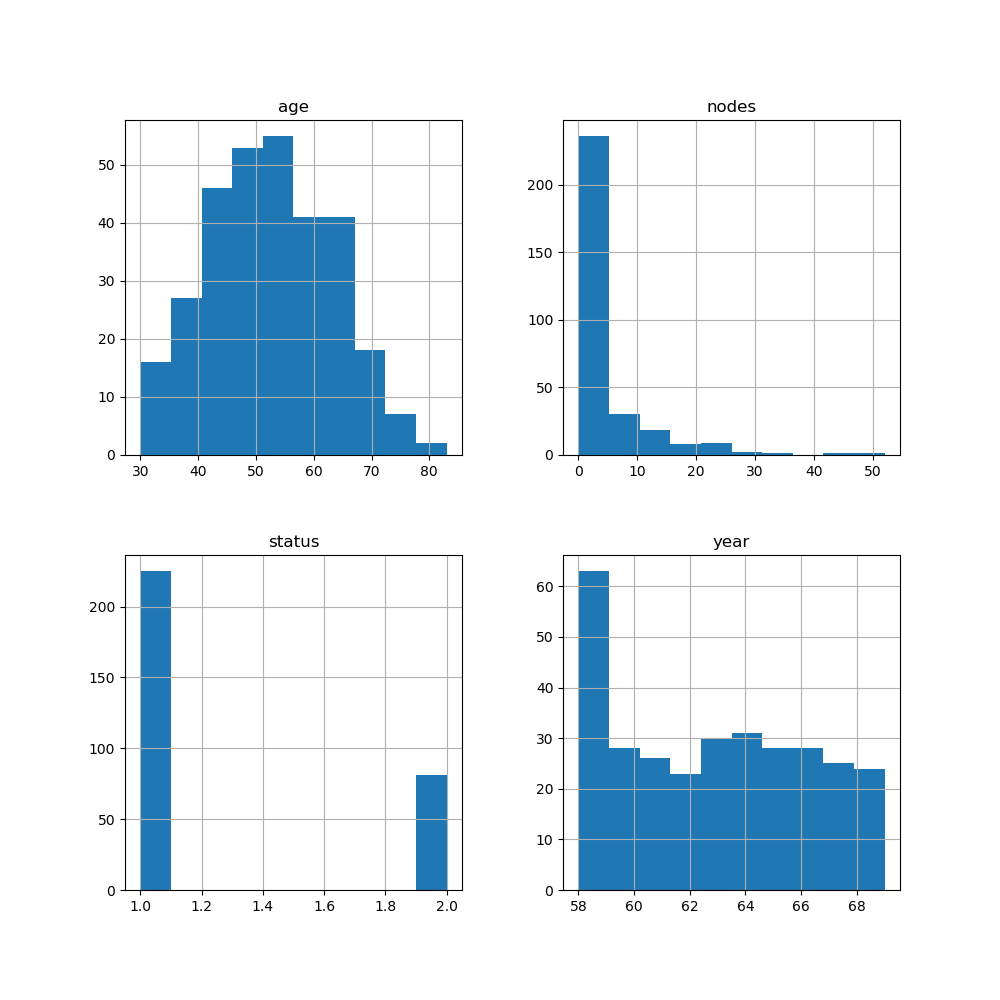

In [4]:
data.hist(bins=10,figsize=(10,10))
plt.show()

# observations:

1. From the 'AGE' feature histogram we see age of patients that had surgery lie between 30 and 83, we can also see more no.of patients are aged between 41 and 55.

2. Most of the patients had axillary nodes between 0-5 as of the 'Nodes' histogram and maximum no.of axillary nodes a person had is 52.

3. Most of the surgeries were performed during the years of 1958 and 1959




In [17]:
print('Five Number Summary::\n')
print('AGE:\n','min::',data.age.min(),'1st qunatile::',data.age.quantile(0.25),'2nd qunatile::',data.age.quantile(0.5),'3rd qunatile::',data.age.quantile(0.75),'max::',data.age.max())
print('YEAR:\n','min::',data.year.min(),'1st qunatile::',data.year.quantile(0.25),'2nd qunatile::',data.year.quantile(0.5),'3rd qunatile::',data.year.quantile(0.75),'max::',data.year.max())


Five Number Summary::

AGE:
 min:: 30 1st qunatile:: 44.0 2nd qunatile:: 52.0 3rd qunatile:: 60.75 max:: 83
YEAR:
 min:: 58 1st qunatile:: 60.0 2nd qunatile:: 63.0 3rd qunatile:: 65.75 max:: 69


<IPython.core.display.Javascript object>


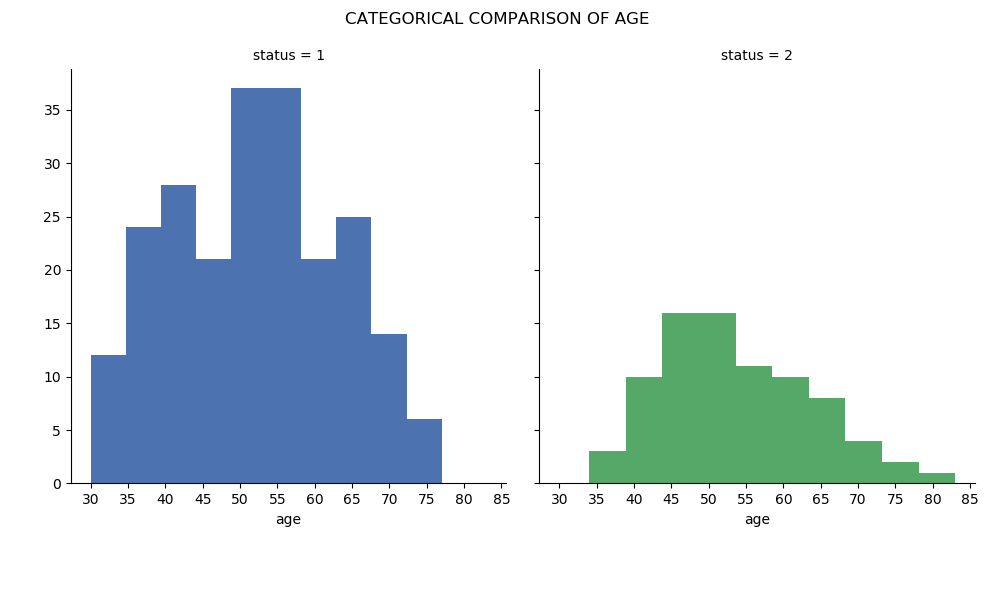

<IPython.core.display.Javascript object>


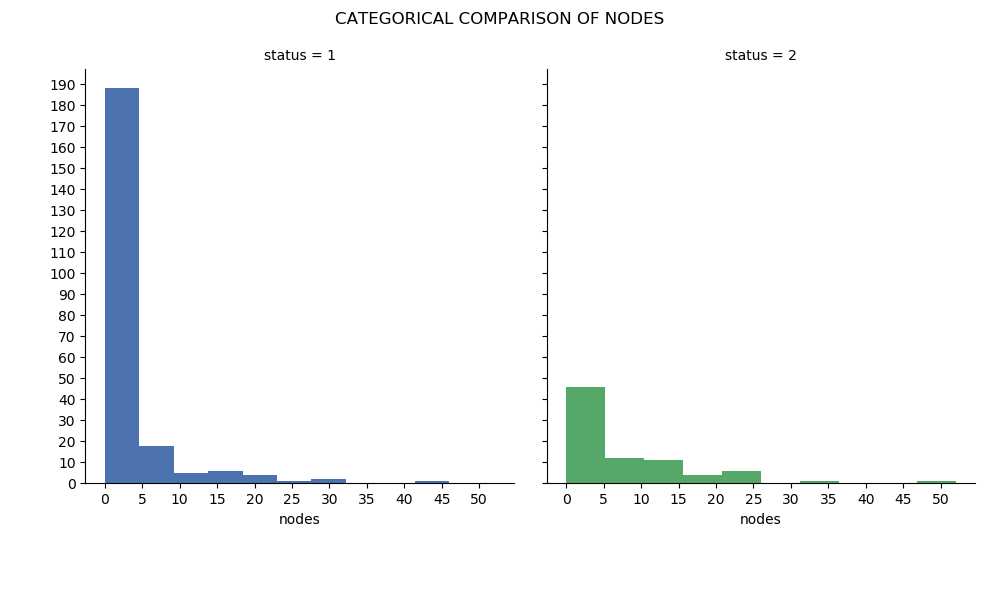

<IPython.core.display.Javascript object>


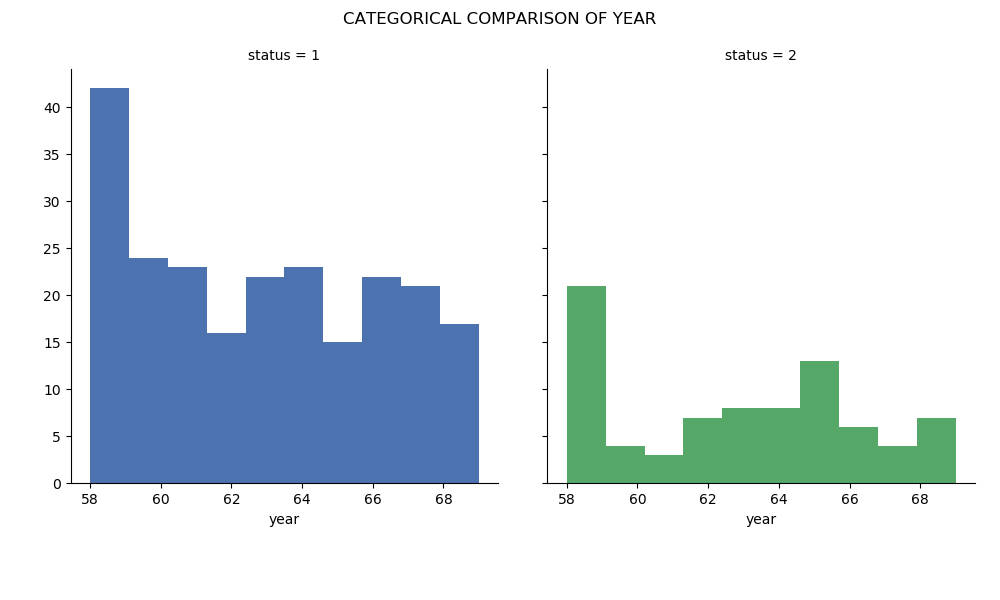

In [5]:
status1_data = data[data.status == 1]
status2_data = data[data.status == 2]

age = sns.FacetGrid(data,hue = 'status',col = 'status',palette='deep').map(plt.hist,'age')

age.set(xticks=np.arange(30,90,5))
age.fig.set_size_inches(10,6)
plt.suptitle('CATEGORICAL COMPARISON OF AGE ')
node = sns.FacetGrid(data,hue = 'status',col = 'status',palette='deep').map(plt.hist,'nodes')

node.set(xticks=np.arange(0,55,5))
node.set(yticks=np.arange(0,200,10))
node.fig.set_size_inches(10,6)
plt.suptitle('CATEGORICAL COMPARISON OF NODES')
year = sns.FacetGrid(data,hue = 'status',col = 'status',palette='deep',).map(plt.hist,'year',)

year.fig.set_size_inches(10,6)
plt.suptitle('CATEGORICAL COMPARISON OF YEAR')

plt.show()

# observations:

1. From the above plots we can notice the following observations:
   
   * From Age plot we observe,
       all patients between ages 30-34 have survived after the operation and there were no patients that survived above age 76,
      most of the patients that got survived more than five years are aged between 50 and 60 ,most of patients that didn't survive for five years are between 45 and 53.
     
   * From the Nodes plot,
     no.of nodes lies mostly between 0 and 5 for both patients that got survived and patients that didn't survive,
     as per the data available we can't find any patients that survived with axillary nodes more than 46.
   
   * From the Year plot,
     we can see most of the operations were performed during the years 1958 and 1959 for both patients that survived and patients that didn't survive.

     

<IPython.core.display.Javascript object>


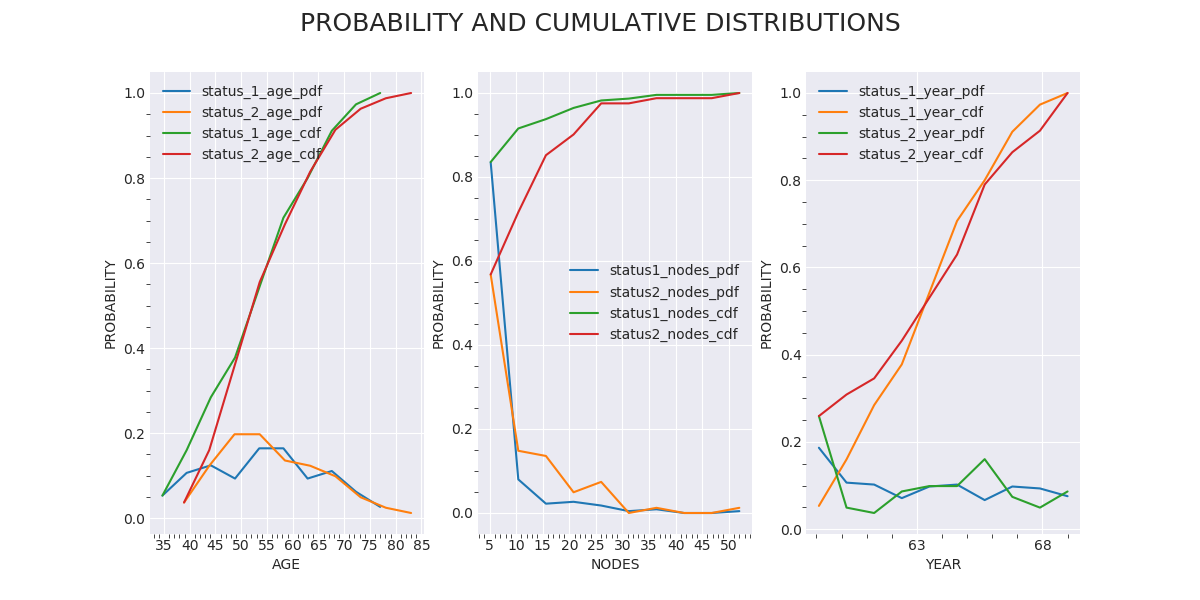

In [6]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(12,6))

fig.suptitle('PROBABILITY AND CUMULATIVE DISTRIBUTIONS',fontsize = 18,ha = 'center')

plt.subplot(1,3,1,)

age1_count,bins_1 = np.histogram(status1_data.age,bins=10)

status1_age_pdf = age1_count/sum(age1_count)
status1_age_cdf = np.cumsum(status1_age_pdf)

age2_count,bins_2 = np.histogram(status2_data.age,bins = 10)

status2_age_pdf = age2_count/sum(age2_count)
status2_age_cdf = np.cumsum(status2_age_pdf)

plt.xticks(np.arange(30,90,5))
plt.tick_params(which = 'minor',length = 3)

plt.minorticks_on()

plt.plot(bins_1[1:],status1_age_pdf,label = 'status_1_age_pdf')
plt.plot(bins_2[1:],status2_age_pdf,label = 'status_2_age_pdf')
plt.plot(bins_1[1:],status1_age_cdf,label = 'status_1_age_cdf')
plt.plot(bins_2[1:],status2_age_cdf,label = 'status_2_age_cdf')

plt.xlabel('AGE')
plt.ylabel('PROBABILITY')
plt.legend()

plt.subplot(1,3,2,)

status1_nodes_count,bin_edges = np.histogram(status1_data.nodes)

status1_nodes_pdf = status1_nodes_count/sum(status1_nodes_count)
status1_nodes_cdf = np.cumsum(status1_nodes_pdf)

status2_nodes_count,bin_edges = np.histogram(status2_data.nodes)

status2_nodes_pdf = status2_nodes_count/sum(status2_nodes_count)
status2_nodes_cdf = np.cumsum(status2_nodes_pdf)

plt.xticks(np.arange(data.nodes.min(),data.nodes.max(),5))
plt.xlabel('NODES')
plt.ylabel('PROBABILITY')
plt.tick_params(which = 'minor',length = 3)

plt.minorticks_on()

plt.plot(bin_edges[1:],status1_nodes_pdf,label = 'status1_nodes_pdf')
plt.plot(bin_edges[1:],status2_nodes_pdf,label = 'status2_nodes_pdf')
plt.plot(bin_edges[1:],status1_nodes_cdf,label = 'status1_nodes_cdf')
plt.plot(bin_edges[1:],status2_nodes_cdf,label = 'status2_nodes_cdf')

plt.legend()

plt.subplot(133)

status_1_year_count,bin_edges = np.histogram(status1_data.year,bins = 10)
status_1_year_pdf = status_1_year_count/np.sum(status_1_year_count)
status_1_year_cdf = np.cumsum(status1_age_pdf)
status_2_year_count,bin_edges = np.histogram(status2_data.year,bins = 10)
status_2_year_pdf = status_2_year_count/np.sum(status_2_year_count)
status_2_year_cdf = np.cumsum(status_2_year_pdf)

plt.xticks(np.arange(data.year.min(),data.year.max()+5,5))
plt.xlabel('YEAR')
plt.ylabel('PROBABILITY')
plt.tick_params(which = 'minor',length = 3)

plt.minorticks_on()
plt.plot(bin_edges[1:],status_1_year_pdf,label = 'status_1_year_pdf')
plt.plot(bin_edges[1:],status_1_year_cdf,label = 'status_1_year_cdf')
plt.plot(bin_edges[1:],status_2_year_pdf,label = 'status_2_year_pdf')
plt.plot(bin_edges[1:],status_2_year_cdf,label = 'status_2_year_cdf')

plt.legend()
plt.show()



# observations:

1. From the above plots of age we can see that for status-1 100% of data falls below 77 and for status-2 100% of        data falls below 83.
2. From the Axillary Nodes plot we can see that 83% of  data with status-1 falls below 5 nodes and 100% of data 
   falls below 46 nodes,
   58% of data with status-2 falls below 5-nodes and 100% of data with status-2 falls below 52 nodes.
3. We can observe that probabiility of having nodes > 5 is low for both status-1 and status-2. 

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


# observations:

By applying describe function on the data tells,

    1.Age of patients that got operated lies between 30 and 83,mean of age is 52.45 and median is 52.0 which makes it a symmetric distribution,standard deviation is 10.80 which tells that most of the data falls between 42 and 62.
    2.Axillary Nodes lie between 0-52,mean of nodes is 4.02 and median is 1 making the distribution symmetric,standard deviation is 7.18.
    3.In the given data surgeries were performed between year 1958 and 1969,mean of year is 62.85(63),std is 3.2
    
From the five figure summary(min,25%,50%,75%,max) we see that the IQR's for,
    
    AGE:   16.75
    NODES: 4.00
    YEAR:  5.75

As we can see that there is a difference between mean and median values for the 'axillary nodes' which makes the distribution skewed and also IQR is 4.0 which tells us that 50% of data lies around 4.0.
So we can use median and IQR as parameters for the spread and outliers for nodes, mean and standard deviation as parameters for 'Age'.



<IPython.core.display.Javascript object>


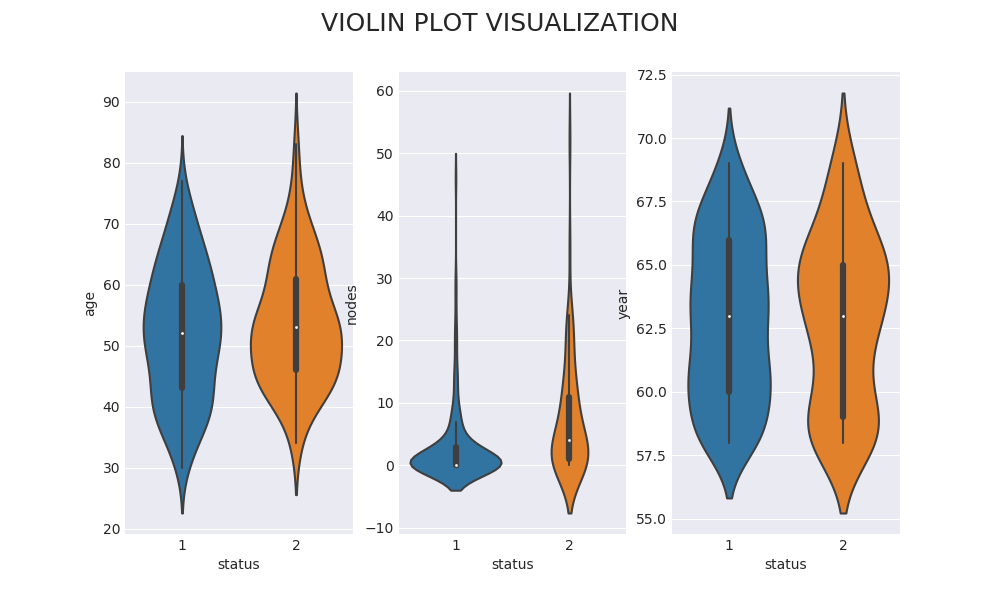

In [13]:
fig_1 = plt.figure(figsize=(10,6))
fig_1.suptitle('VIOLIN PLOT VISUALIZATION',fontsize = 18,ha = 'center')
plt.subplot(1,3,1)
sns.violinplot(data=data,x='status',y = 'age',)
plt.subplot(1,3,2)
sns.violinplot(data=data,x='status',y = 'nodes',)
plt.subplot(1,3,3)
sns.violinplot(data=data,x='status',y = 'year',)
plt.show()

<IPython.core.display.Javascript object>


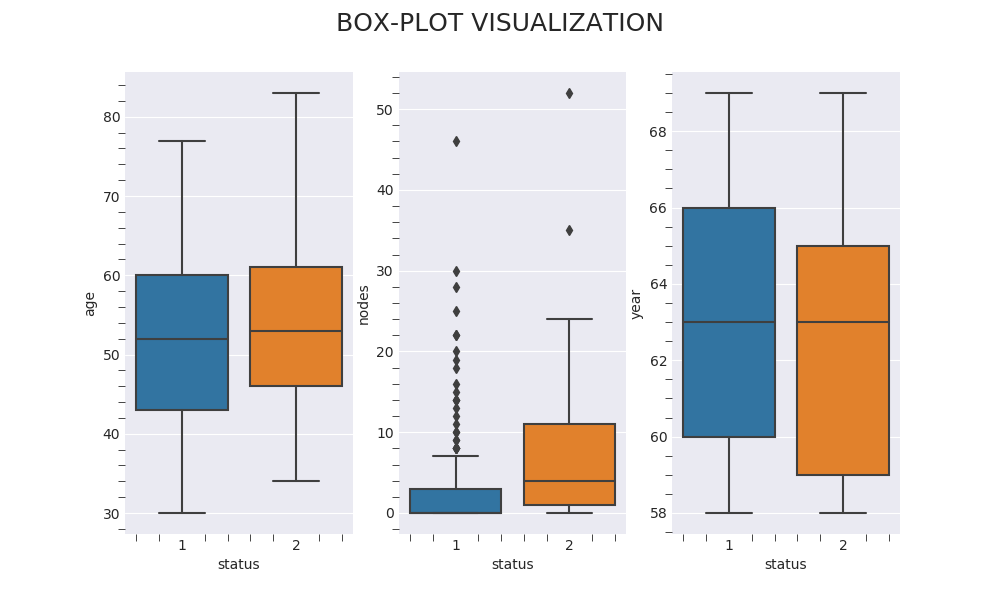

In [14]:
fig_2 = plt.figure(figsize=(10,6))
fig_2.suptitle('BOX-PLOT VISUALIZATION',fontsize = 18,ha = 'center')
plt.subplot(1,3,1)
sns.boxplot(data = data,y = data.age,x='status')
plt.tick_params(which = 'minor',length = 5,)
plt.minorticks_on()
plt.subplot(1,3,2)
sns.boxplot(data = data,y = data.nodes,x='status')
plt.tick_params(which = 'minor',length = 5)
plt.minorticks_on()
plt.subplot(1,3,3)
sns.boxplot(data = data,y = data.year,x = 'status')
plt.tick_params(which = 'minor',length = 5)
plt.minorticks_on()



# observations:

The above plot gives visualization of the five figure summary(min,25%,50%,75%,max) for all 3 variables and also we can clearly see that patients aged between 30-34 are likely to survive and patients aged above 77 are less likely to survive


# Bivariate Analysis

<IPython.core.display.Javascript object>


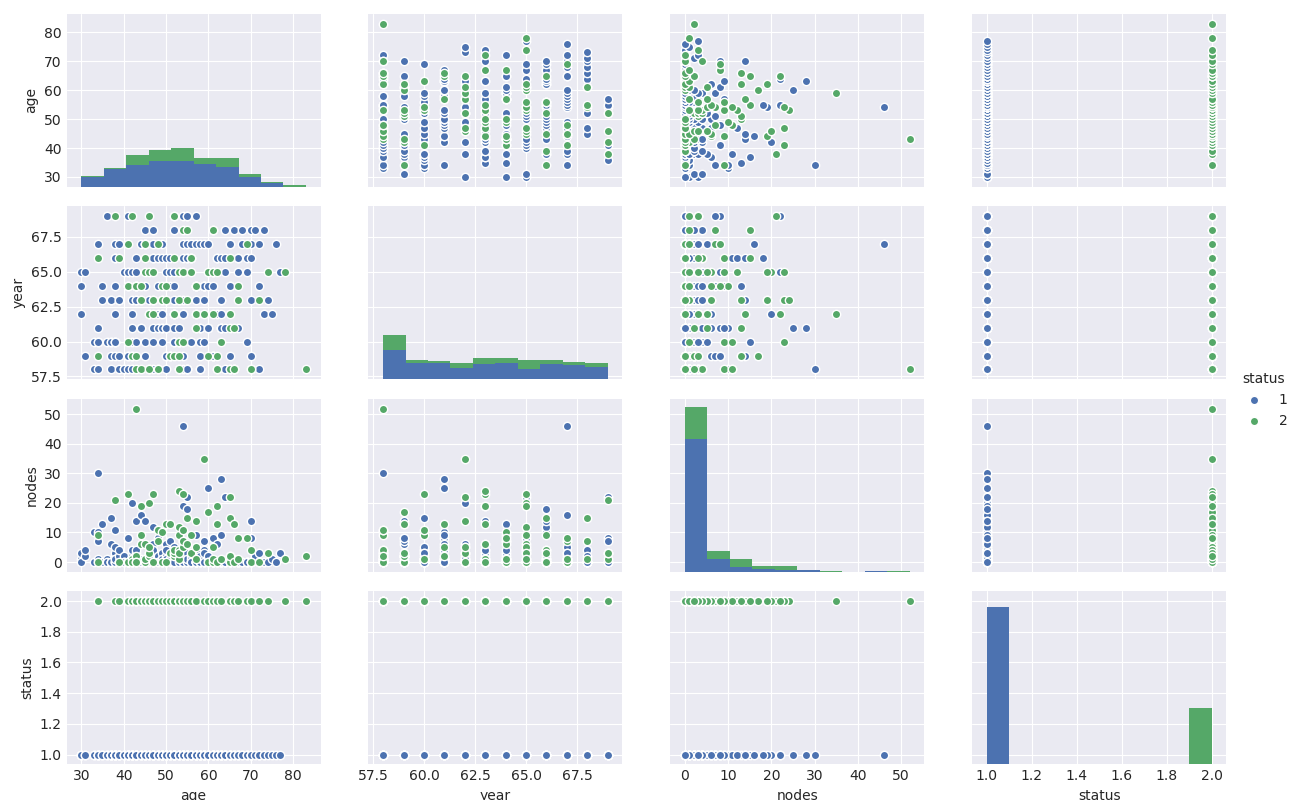

In [10]:
g = sns.pairplot(data,hue = 'status',palette='deep',size=3)

g.fig.set_figheight(8)
g.fig.set_figwidth(13)

# observations:

1. The scatter plots above doesn't really give any proper insights about the data and features seems to have no relation between them, making them independent to each other.

# CONCLUSION:

1.From the over all data,we can observe that the chances of survival is high.

2.From all the above observations we can say that patients aged 30-34 are likely to survive for 5 years or longer and the chances of survival is less for patients above age 76 as per the given data.

3.We can observe that patients with axillary nodes between 0-5 are more likely to survive.

4.'Year' doesn't seem to give much information.

5.From the Bivariate analysis we can conclude that the variables are independent to each other.